In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import svm, model_selection as ms, metrics

# Ex. 4

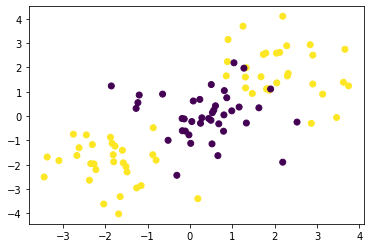

In [57]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=200).reshape(100, 2)
X[:30] = X[:30] + 2
X[30:60] = X[30:60] - 2
y = np.concatenate((np.ones(60), -np.ones(40)))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [58]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.25, random_state=seed)

In [65]:
def plot_decision(model, X, y, pad=1.):

    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(model.__repr__())


Test accuracy: 0.52


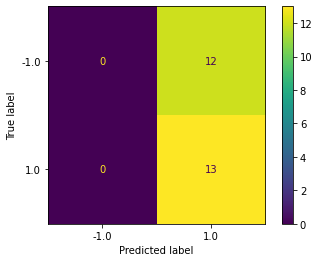

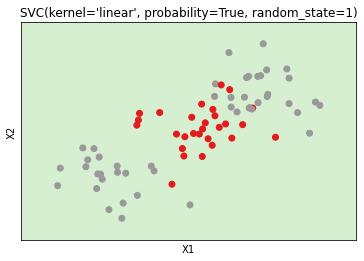

In [60]:
model = svm.SVC(kernel='linear', probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.96


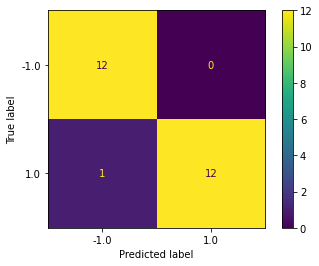

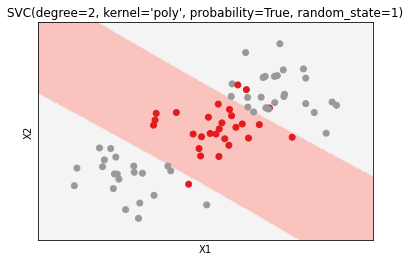

In [31]:
model = svm.SVC(kernel='poly', degree=2, probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.84


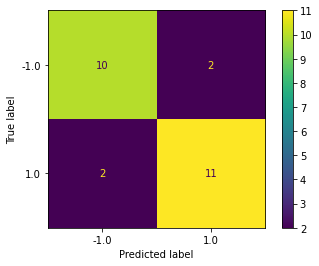

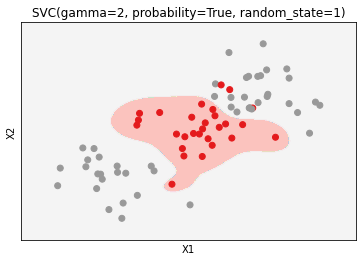

In [32]:
model = svm.SVC(kernel='rbf', gamma=2, probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Plots show that poly kernel with 2 degrees performs best on test data.

# Ex. 5

Text(0, 0.5, 'X2')

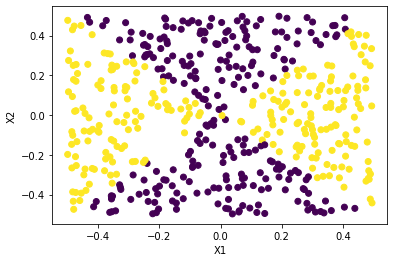

In [61]:
seed = 1
np.random.seed(seed)
X = np.random.uniform(low=-.5, high=.5, size=1000).reshape(500, 2)
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')

In [222]:
def plot_results(model, X, y, x1_idx=0, x2_idx=1, pad=1.):

    x_min, x_max = X[:, x1_idx].min() - pad, X[:, x1_idx].max() + pad
    y_min, y_max = X[:, x2_idx].min() - pad, X[:, x2_idx].max() + pad

    preds = model.predict(X)

    plt.scatter(X[:, x1_idx], X[:, x2_idx], c=preds, cmap=plt.cm.Set1)
    plt.xlabel(f'X{x1_idx}')
    plt.ylabel(f'X{x2_idx}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(model.__repr__())

In [62]:
from sklearn.linear_model import LogisticRegression

Test accuracy: 0.548


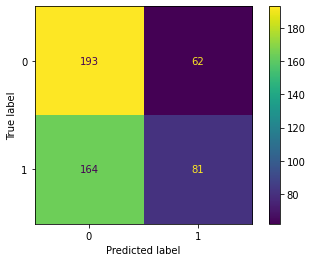

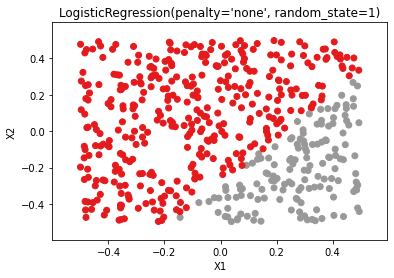

In [70]:
model = LogisticRegression(penalty='none', random_state=seed)
model.fit(X, y)

metrics.plot_confusion_matrix(model, X, y)
plt.figure()
plot_results(model, X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(X))}')

In [71]:
aug_X = np.hstack([X, X ** 2])

Test accuracy: 1.0


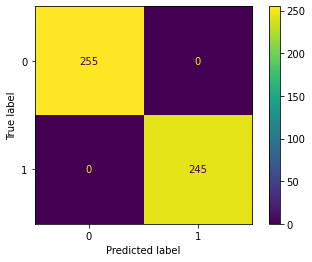

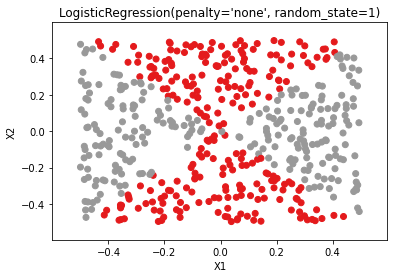

In [72]:
model = LogisticRegression(penalty='none', random_state=seed)
model.fit(aug_X, y)

metrics.plot_confusion_matrix(model, aug_X, y)
plt.figure()
plot_results(model, aug_X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(aug_X))}')

Test accuracy: 0.51


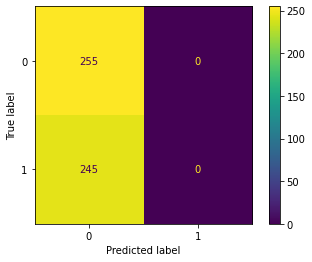

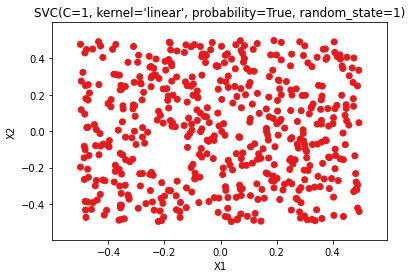

In [76]:
model = svm.SVC(kernel='linear', C=1, probability=True, random_state=seed)
model.fit(X, y)

metrics.plot_confusion_matrix(model, X, y)
plt.figure()
plot_results(model, X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(X))}')

Test accuracy: 0.98


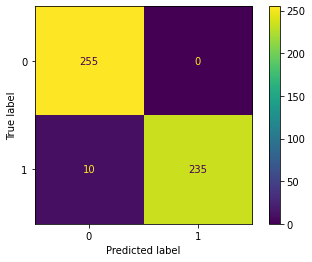

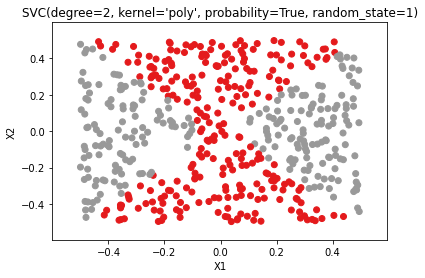

In [77]:
model = svm.SVC(kernel='poly', degree=2, probability=True, random_state=seed)
model.fit(X, y)

metrics.plot_confusion_matrix(model, X, y)
plt.figure()
plot_results(model, X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(X))}')

It's clearly seen that logistic regregression with linear features cannot figure out the relationship, however it performs better then SVM with linear kernel. Logistic regression with squared features perfectly fits train data, SVM with poly kernel with 2 degrees performs almost perfect.

# Ex. 6

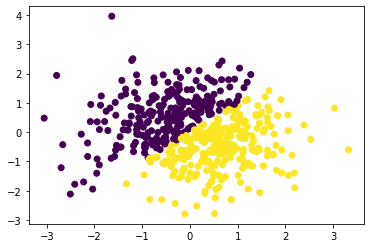

In [102]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=1000).reshape(500, 2)
y = (X[:, 0] - X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [158]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs = ms.GridSearchCV(svm.SVC(kernel='linear', random_state=seed), grid, cv=cv)
gs.fit(X, y)

pd.DataFrame(gs.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

,param_C,mean_test_score,std_test_score
0,0.01,0.988,0.018330
1,0.1,0.996,0.008000
2,1,0.988,0.016000
3,10,0.992,0.013266
4,100,0.994,0.009165
5,1000,0.996,0.008000
6,10000,1.000,0.000000


Model with highest cost fits train data perfectly.

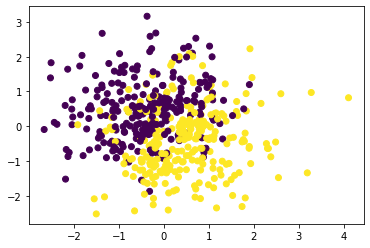

In [168]:
seed = 2
np.random.seed(seed)
X_test = np.random.normal(size=1000).reshape(500, 2)
y_test = (X_test[:, 0] - X_test[:, 1] > 0).astype(int)
for i in range(200, 300):
    X_test[i] = -X_test[i] if abs(X_test[i][0] - X_test[i][1]) < 2 else X_test[i]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [169]:
for c in grid['C']:
    model = svm.SVC(kernel='linear', C=c, random_state=seed)
    model.fit(X, y)
    print(f'{c}: {model.score(X_test, y_test)}')

0.01: 0.834
0.1: 0.834
1.0: 0.84
10.0: 0.836
100.0: 0.836
1000.0: 0.834
10000.0: 0.836


Several models except one with lowest cost showed good results. Model with cost of 1 is the best.

# Ex. 7

In [203]:
dataset_file = '../datasets/Auto.csv'
data = pd.read_csv(dataset_file)
data.drop(['name'], axis=1, inplace=True)
data = data.loc[data.horsepower != '?']
data.horsepower = data.horsepower.apply(int)
cyl_dummies = pd.get_dummies(data.cylinders, prefix='cylinders', prefix_sep='').drop(['cylinders8'], axis=1)
origin_dummies = pd.get_dummies(data.origin, prefix='origin', prefix_sep='').drop(['origin3'], axis=1)
data['above'] = (data.mpg > data.mpg.median()).astype(int)
data = pd.concat([data.drop(['mpg', 'cylinders', 'origin'], axis=1), cyl_dummies, origin_dummies], axis=1)
data.head()

/home/ivan/Documents/6_projects/ds_venv/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,displacement,horsepower,weight,acceleration,year,above,cylinders3,cylinders4,cylinders5,cylinders6,origin1,origin2
0,307.0,130,3504,12.0,70,0,0,0,0,0,1,0
1,350.0,165,3693,11.5,70,0,0,0,0,0,1,0
2,318.0,150,3436,11.0,70,0,0,0,0,0,1,0
3,304.0,150,3433,12.0,70,0,0,0,0,0,1,0
4,302.0,140,3449,10.5,70,0,0,0,0,0,1,0


In [204]:
X = data.drop(['above'], axis=1)
y = data.above

In [205]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs1 = ms.GridSearchCV(svm.SVC(kernel='linear', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=1)
gs1.fit(X, y)

pd.DataFrame(gs1.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   55.3s finished


,param_C,mean_test_score,std_test_score
0,0.01,0.913333,0.025866
1,0.1,0.918462,0.027252
2,1,0.908141,0.030793
3,10,0.908141,0.032859
4,100,0.908141,0.032859
5,1000,0.905577,0.032593
6,10000,0.905577,0.032593


In [206]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs2 = ms.GridSearchCV(svm.SVC(kernel='rbf', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=1)
gs2.fit(X, y)

results = pd.DataFrame(gs2.cv_results_)
results[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    1.0s finished


,param_C,param_gamma,mean_test_score,std_test_score
30,10000,0.01,0.765256,0.068688
25,1000,0.01,0.765256,0.068688
20,100,0.01,0.765256,0.068688
15,10,0.01,0.765256,0.068688
10,1,0.01,0.760192,0.068019
16,10,0.1,0.558590,0.069230
31,10000,0.1,0.558590,0.069230
26,1000,0.1,0.558590,0.069230
21,100,0.1,0.558590,0.069230
11,1,0.1,0.550962,0.072004


In [235]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.],
    'degree': [2, 3, 4]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs3 = ms.GridSearchCV(svm.SVC(kernel='poly', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=1)
gs3.fit(X, y)

results = pd.DataFrame(gs3.cv_results_)
results[['param_C', 'param_degree', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.6s finished


,param_C,param_degree,mean_test_score,std_test_score
19,10000,3,0.910833,0.037900
18,10000,2,0.908269,0.039551
20,10000,4,0.903269,0.041719
16,1000,3,0.903269,0.040274
12,100,2,0.903269,0.035036
15,1000,2,0.903141,0.035604
13,100,3,0.898205,0.042004
17,1000,4,0.895641,0.037769
14,100,4,0.895641,0.039554
11,10,4,0.887949,0.037576


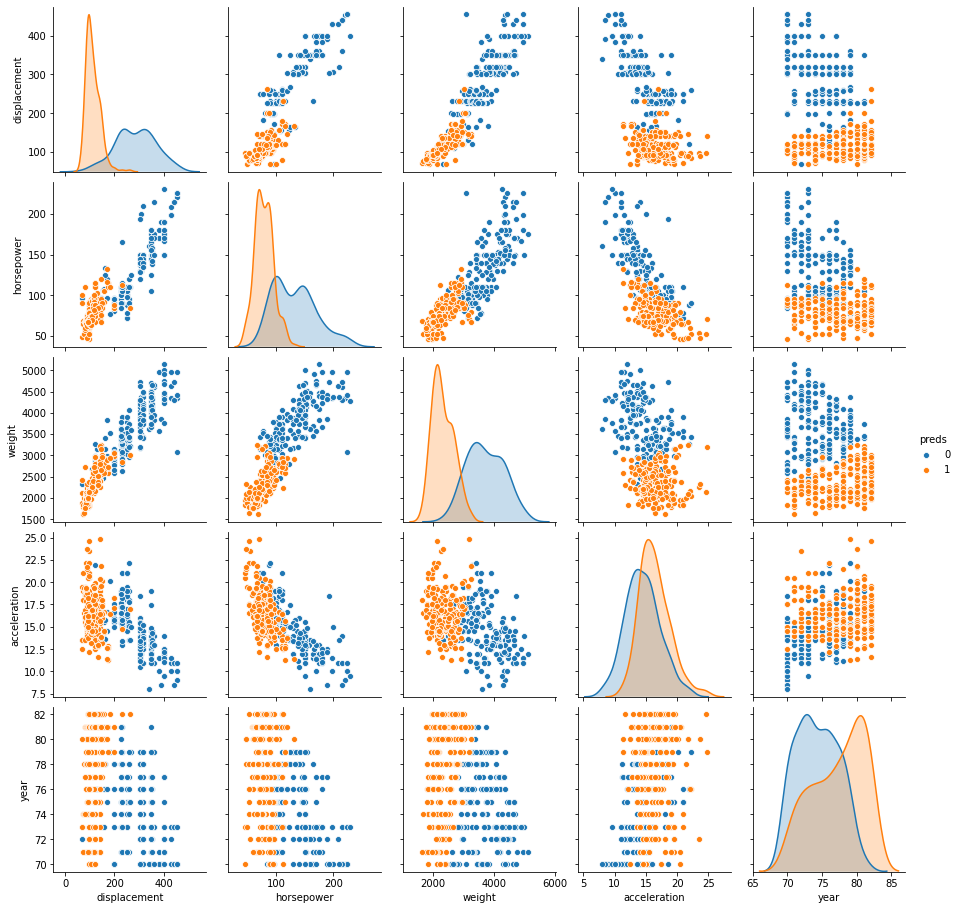

In [236]:
preds = gs1.best_estimator_.predict(X)
data_with_preds = X.drop(['origin1', 'origin2', 'cylinders3', 'cylinders4', 'cylinders5', 'cylinders6'], axis=1)
data_with_preds['preds'] = preds

sns.pairplot(
    data=data_with_preds,
    hue='preds'
)

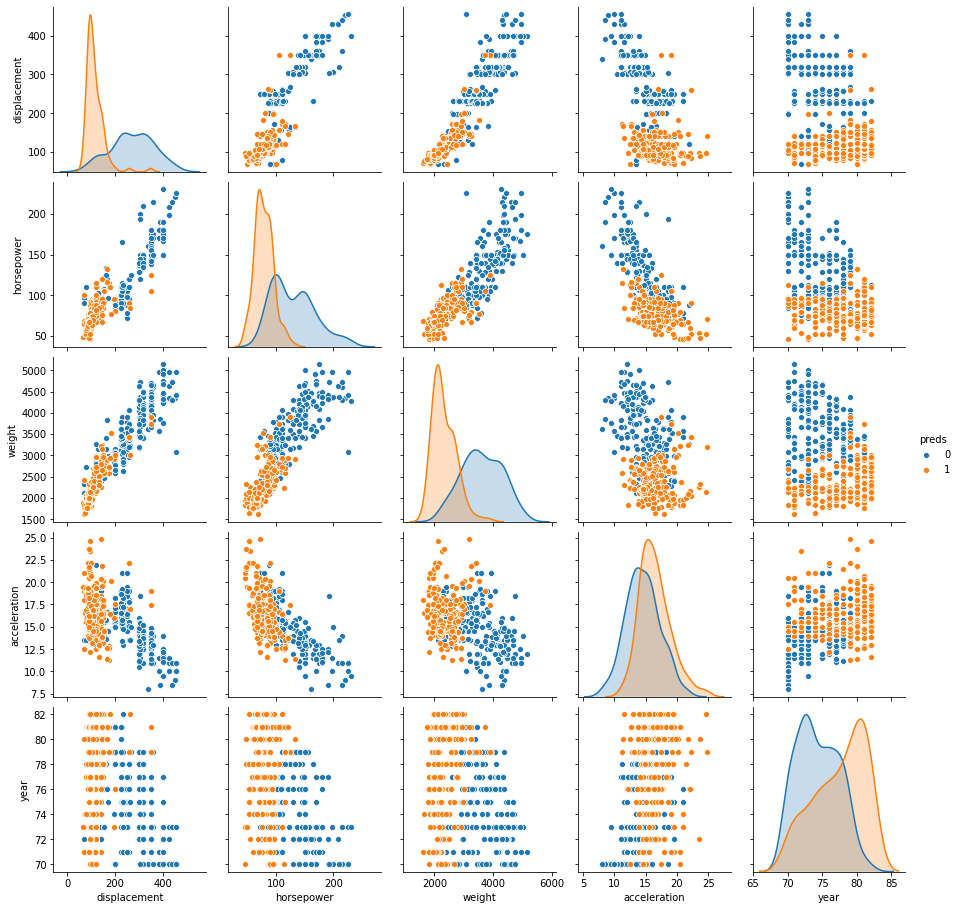

In [237]:
preds = gs2.best_estimator_.predict(X)
data_with_preds = X.drop(['origin1', 'origin2', 'cylinders3', 'cylinders4', 'cylinders5', 'cylinders6'], axis=1)
data_with_preds['preds'] = preds

sns.pairplot(
    data=data_with_preds,
    hue='preds'
)

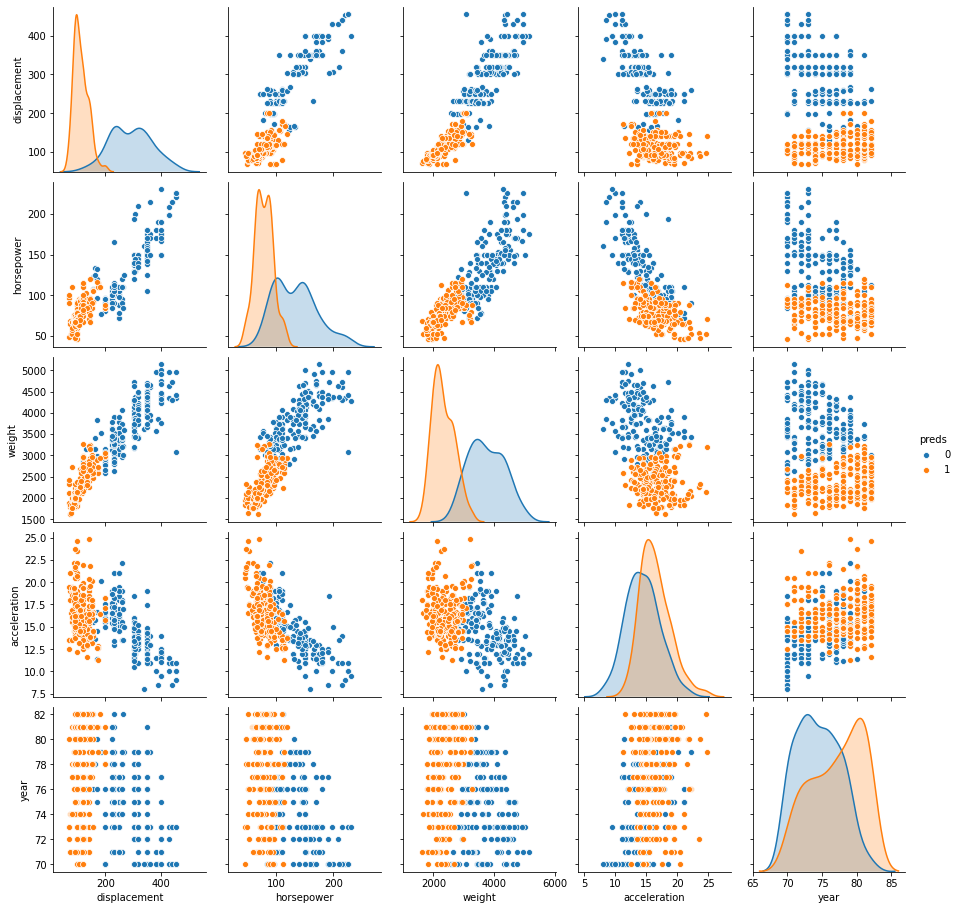

In [238]:
preds = gs3.best_estimator_.predict(X)
data_with_preds = X.drop(['origin1', 'origin2', 'cylinders3', 'cylinders4', 'cylinders5', 'cylinders6'], axis=1)
data_with_preds['preds'] = preds

sns.pairplot(
    data=data_with_preds,
    hue='preds'
)

SVM with linear kernel fits train data best. Among models with polynomial kernel the one with 3 degrees is the best. Models with radial kernel perform much worse.

# Ex. 8